In [1]:
import os
import numpy as np
import tensorflow as tf
from dataset import Dataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
DATA_DIR = os.path.abspath("adsp-data/494_bus")

In [3]:
d = Dataset(DATA_DIR)
X = d.df
X

,branch-instructions,branch-misses,bus-cycles,cache-misses,unc_c_ring_ak_used.up_even,unc_c_ring_ak_used.up_odd,unc_c_ring_bl_used.all,l2_rqsts.all_demand_references,l2_rqsts.all_pf,l2_rqsts.all_rfo,...,l2_lines_out.demand_clean,unc_c_ring_ak_used.all,unc_c_ring_ak_used.down,unc_c_ring_ak_used.down_even,unc_c_ring_ak_used.down_odd,l2_lines_out.demand_dirty,l2_rqsts.all_code_rd,l2_rqsts.all_demand_data_rd,l2_rqsts.all_demand_miss,unc_c_ring_ak_used.up
0.0_0.0,260672366.0,330579.0,144792613.0,965303.0,28531599.8,24572764.9,122897926.3,2686184.0,4864048.0,997039.0,...,2726448.0,137330562.5,83349063.1,37948997.6,47188243.3,13079.0,240505.0,1454952.0,2045232.0,52845651.0
0.01_0.01,252450897.0,327960.0,137767630.0,979578.5,27582160.6,24682983.4,122625213.3,2713983.0,4841167.0,1000459.0,...,2730348.0,136519570.9,83055190.7,36515639.4,47011233.4,27004.0,246039.0,1456007.0,2061588.0,52526322.9
0.01_0.02,237917834.0,333502.0,136942520.5,982527.5,27731948.3,24861056.7,120718004.0,2721780.0,5121413.0,992342.0,...,2730237.0,135731550.5,83833996.8,36427570.7,47459392.7,49974.0,247458.0,1483775.0,2091321.0,52263696.2
0.01_0.03,248882156.5,330325.0,136418725.5,963803.5,27997441.7,24579344.8,121296308.6,2714233.0,5052632.0,998329.0,...,2725032.0,136539908.8,83633367.8,36403075.4,46715551.6,15397.0,247531.0,1501840.0,2084955.0,52707245.7
0.01_0.04,296797127.5,333691.5,154771847.0,969474.0,27651486.9,24818776.0,122379430.1,2697366.0,4933404.0,992418.0,...,2678780.0,136728303.5,83927311.9,36431581.1,47188565.9,21914.0,251669.0,1485753.0,2070138.0,52363832.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.1_0.06,250863429.5,332837.0,139218547.0,971695.5,27479690.1,24812467.2,123566719.2,2762965.0,5044125.0,1009405.0,...,2772113.0,136396155.9,83062217.7,36782333.1,46864140.0,25273.0,257743.0,1475990.0,2084802.0,53369201.7
0.1_0.07,243935316.0,332224.5,138084503.5,979994.0,28601909.5,24697362.5,125034216.5,2733947.0,4943392.0,1010497.0,...,2706935.0,136114357.4,84179052.7,37262142.1,47588735.4,42807.0,244875.0,1484210.0,2097834.0,52977104.1
0.1_0.08,250330380.0,331117.0,141210890.0,980939.5,28484942.1,24910258.1,122295079.3,2726120.0,4970150.0,1003911.0,...,2770895.0,137341151.5,84247285.9,36585310.5,46773550.6,37571.0,245023.0,1470336.0,2085445.0,52830541.1
0.1_0.09,257758261.5,333472.5,139637622.0,978840.0,28405114.9,25391065.6,122181270.4,2719340.0,4965523.0,1003700.0,...,2744895.0,136099410.0,83997180.6,36323451.0,46507653.2,25706.0,257035.0,1493277.0,2097495.0,53712902.3


In [4]:
# Save X to the Excel file
X.to_excel("dataframe_494_bus_with_index.xlsx", index=True)

In [12]:
# Load the Excel file

X = pd.read_excel("dataframe_494_bus_with_index_accuracy.xlsx", index_col=0)
X

,unc_c_llc_victims.s_state,dtlb_store_misses.stlb_hit,dtlb_load_misses.miss_causes_a_walk,dtlb_load_misses.walk_completed,msr/aperf/,dtlb_load_misses.walk_completed_4k,unc_m_rd_cas_rank1.bank4
0.0_0.0,453.2,674357,28800,27184,3337297871,16880,411863.50
0.01_0.01,1344.0,605495,28925,27092,3411977781,15573,526498.50
0.01_0.02,821.4,594067,29651,28503,3329246303,15731,12104.00
0.01_0.03,1759.6,611035,28582,26659,3378413816,15816,125831.50
0.01_0.04,1297.0,617758,28659,26513,3355038169,16166,39779.25
...,...,...,...,...,...,...,...
0.1_0.06,344.4,629104,29175,26921,3338813832,17045,20439.00
0.1_0.07,510.5,607367,29501,27358,3404363538,17018,22187.50
0.1_0.08,522.7,633988,29543,27246,3386266286,16895,29041.00
0.1_0.09,741.6,602859,29153,27483,3298074747,16681,97291.75


In [6]:
y = np.array([i[0] *100 for i in d.labels])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

#y_train = tf.one_hot(y_train, 11)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_test

array([ 1.,  5.,  9.,  4.,  4.,  2.,  9.,  5., 10.,  9.,  8.,  3.,  8.,
        5.,  6.,  3.,  6.,  4.,  6.,  0.,  8.,  5.,  8.,  3.,  8., 10.,
       10.,  7., 10.,  1.,  8.,  4.,  9.,  6.])

In [7]:
batch_size = 32
shuffle_buffer_size = 1000
ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
ds = ds.shuffle(shuffle_buffer_size)
ds = ds.batch(batch_size).prefetch(1)

In [8]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1),
])

optimizer = tf.keras.optimizers.SGD()
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=100)
model.summary()


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0575 - loss: 4.1321  
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0760 - loss: 3.6984 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0913 - loss: 3.7454 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1300 - loss: 3.2508 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1105 - loss: 2.8960 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1456 - loss: 2.4868 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1300 - loss: 2.4114 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1222 - loss: 1.8878 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1261 - loss: 1.4307 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1105 - loss: 1.0871 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1456 - loss: 0.7862 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1144 - l

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │         112,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,475 (443.27 KB)

 Trainable params: 113,473 (443.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [9]:
results = model.predict(X_test)
#results = tf.argmax(results, axis=-1).numpy()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


MSE: 10.447441101074219, MAE: 2.4957637786865234, Accuracy: 0.0


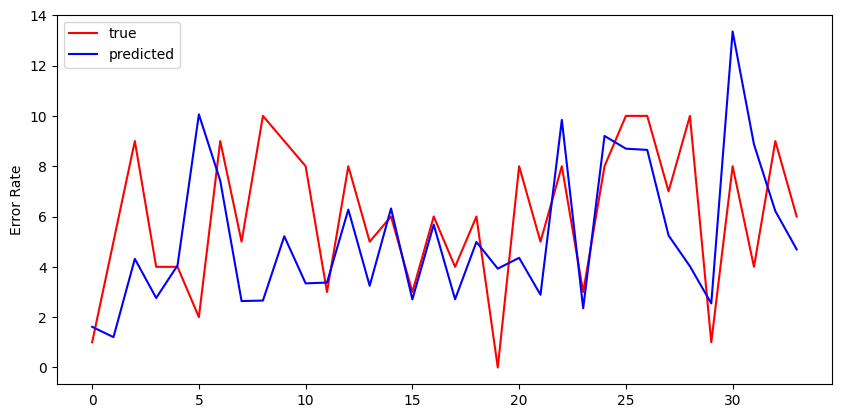

In [10]:
mse_metric = tf.keras.metrics.MeanSquaredError()
mse_metric.update_state(y_test, results)
mse = mse_metric.result().numpy()

mae_metric = tf.keras.metrics.MeanAbsoluteError()
mae_metric.update_state(y_test, results)
mae = mae_metric.result().numpy()

acc_metric = tf.keras.metrics.Accuracy()
acc_metric.update_state(y_test, results)
acc = acc_metric.result().numpy()
print(f"MSE: {mse}, MAE: {mae}, Accuracy: {acc}")

f = plt.figure()
plt.plot(list(range(len(y_test))), [i for i in y_test], color="red", label="true")
plt.plot(list(range(len(y_test))), [i for i in results], color="blue", label="predicted")
plt.ylabel("Error Rate")
f.set_figwidth(10)
plt.legend()
plt.show()